<h1 align="center"> Assignment 10 </h1>
<h3 align="center"> IST 5520: Data Methodologies in Python </h3>
<h3 align="center"> By: SHALINI RALLAPALLI VENKATA </h3>

In [25]:
# Import modules
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import seaborn as sns

In [45]:
dat = pd.read_csv("C:/Users/Shalini/Desktop/data methods python/ToyotaCorolla.csv")
dat.head(1000)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
5,12950,32,61000,Diesel,90,0,0,2000,3,1170
6,16900,27,94612,Diesel,90,1,0,2000,3,1245
7,18600,30,75889,Diesel,90,1,0,2000,3,1245
8,21500,27,19700,Petrol,192,0,0,1800,3,1185
9,12950,23,71138,Diesel,69,0,0,1900,3,1105


In [46]:
dat.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [47]:
#To find any missing values:
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
MetColor,1436.0,0.674791,0.468616,0.0,0.0,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
CC,1436.0,1566.827994,187.182436,1300.0,1400.0,1600.0,1600.00,2000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


## Answer 1.
There are non NAN/missing values after doing the summary on the data set.

In [48]:
dat.corr()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.165067,0.185326,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.133182,-0.148359,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.302150,-0.036197,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.050884,0.092424,0.089614
MetColor,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.034921,0.085243,0.057929
Automatic,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,-0.069321,-0.027654,0.057249
CC,0.165067,-0.133182,0.302150,0.050884,0.034921,-0.069321,1.000000,0.126768,0.651450
Doors,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.126768,1.000000,0.302618
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057929,0.057249,0.651450,0.302618,1.000000


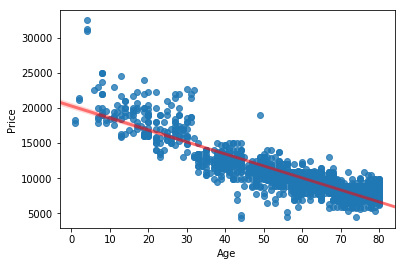

In [49]:
sns.regplot(x="Age", y="Price", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=dat)

## Answer 2. linear association between of Age and Price?
Although, the plot between price and age is scattered, we can see that with the increase in age the Price of the fuel is reducing. We can conclude that with increase in age the amount spent by an individual is less compared to the individuals who have lesser age.

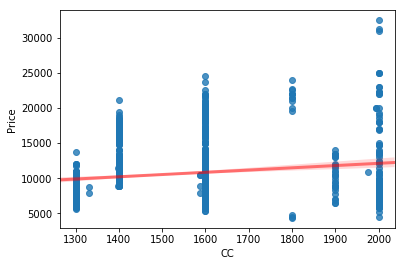

In [50]:
sns.regplot(x="CC", y="Price", 
            line_kws={"color":"r","alpha":0.5,"lw":3}, data=dat)

## Answer 3. linear association between of CC and Price?
From the above plot we can see that the price value has an increase for same CC values. We can see that although the CC value is constant the price value are increasing.
For example: At 1300CC the price range is from 5000 to nearly 15000. Also, wecan see that, with increase in CC value Price increases.
    For example: at 2000CC the Price is > 30000.
 

In [51]:
y, X = dmatrices('Price ~ Age + KM + FuelType + HP + MetColor + Automatic + CC + Doors + Weight',
                 data=dat,
                 return_type='dataframe')

In [52]:
y.head()

,Price
0,13500.0
1,13750.0
2,13950.0
3,14950.0
4,13750.0


In [53]:
X.head()

,Intercept,FuelType[T.Diesel],FuelType[T.Petrol],Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,1.0,1.0,0.0,23.0,46986.0,90.0,1.0,0.0,2000.0,3.0,1165.0
1,1.0,1.0,0.0,23.0,72937.0,90.0,1.0,0.0,2000.0,3.0,1165.0
2,1.0,1.0,0.0,24.0,41711.0,90.0,1.0,0.0,2000.0,3.0,1165.0
3,1.0,1.0,0.0,26.0,48000.0,90.0,0.0,0.0,2000.0,3.0,1165.0
4,1.0,1.0,0.0,30.0,38500.0,90.0,0.0,0.0,2000.0,3.0,1170.0


In [54]:
mod_full = sm.OLS(y,X).fit()
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     948.0
Date:                Thu, 05 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:10:20   Log-Likelihood:                -12346.
No. Observations:                1436   AIC:                         2.471e+04
Df Residuals:                    1425   BIC:                         2.477e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3801.3614   1304.082     -2.915      0.004   -6359.487   -1243.236
FuelType[T.Diesel]  3390.0766    518.795      6.535      0.000    2372.392    4407.761
FuelType[T.Petrol]  1120.6764    332.365      3.372      0.001     468.699    1772.654
Age                 -122.0145      2.602    -46.889      0.000    -127.119    -116.910
KM                    -0.0162      0.001    -12.347      0.000      -0.019      -0.014
HP                    60.8133      5.756     10.565      0.000      49.522      72.104
MetColor              57.1598     74.939      0.763      0.446     -89.843     204.162
Automatic            330.2509    157.096      2.102      0.036      22.087     638.414
CC                    -4.1744      0.545     -7.656      0.000      -5.244      -3.105
Doors                 -7.7763     40.064     -0.194      0.846     -86.368      70.815
Weight                20.0094      1.203     16.629      0.000      17.649      22.370
==============================================================================
Omnibus:                      275.198   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2826.189
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       9.776   Cond. No.                     2.96e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Answer 4. a.	What is the effect of Age on Price? Is it statistically significant?  
From the above we can see that age has negative effect on Price. If age of a person increaes by 1 the Price decreases by -122.0145. Thus we cn say the as the age increases the amount spent on fuel by a person decreases.
Yes the two variables are statistically significant as P<0.001

## Answer 4. b.	What is the coefficient estimate for dummy variable FuelTypeDiesel? What does it mean?  
From the above results, we can see that there are two types of Fuel Petrol and Diesel. The Fuel type Diesel is the dummy variable and has coefficient value 3390.0766. The fuel type petrol has price value 1120.6764.Thus with the coefficient values of the two fuel types we can conclude that the CNG fuel has higher price rate than fuel type petrol.

## Answer 4. b.	c.	List all independent variables that does not have statistically significant effect on Price? 
*𝑝-value >= 0.05, then 𝑋 and 𝑌 have no statistically significant relationship*
From the above results, Met color and doors have p value > 0.05 ie. 0.446 and 0.846 respectively. Thus these two variables have no statistical significance on dependent variable Price

In [57]:
# since the two variables Metcolor and Doors are statistically insignificant we can exclude them and find the OLS results once again
#Model 2
mod_refined2 = sm.OLS(y,X.drop(['MetColor','Doors'],axis=1)).fit()

In [58]:
mod_changed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Thu, 05 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:10:54   Log-Likelihood:                -12346.
No. Observations:                1436   AIC:                         2.471e+04
Df Residuals:                    1427   BIC:                         2.476e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3718.3643   1261.405     -2.948      0.003   -6192.771   -1243.957
FuelType[T.Diesel]  3387.6754    509.044      6.655      0.000    2389.121    4386.229
FuelType[T.Petrol]  1112.1618    331.691      3.353      0.001     461.508    1762.816
Age                 -122.1299      2.596    -47.041      0.000    -127.223    -117.037
KM                    -0.0163      0.001    -12.416      0.000      -0.019      -0.014
HP                    60.8932      5.639     10.799      0.000      49.832      71.954
Automatic            330.4641    156.179      2.116      0.035      24.098     636.830
CC                    -4.1682      0.537     -7.763      0.000      -5.221      -3.115
Weight                19.9383      1.126     17.709      0.000      17.730      22.147
==============================================================================
Omnibus:                      273.470   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2777.912
Skew:                          -0.572   Prob(JB):                         0.00
Kurtosis:                       9.717   Cond. No.                     2.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Answer 5.	Use multiple linear regression model to fit the data again by excluding all statistically insignificant variables in the first model. Compare the two regression models. Fill in the blanks in the following table 
Linear Regression Model1:
Number 0f IVS: 2 (Total Variables): 11  and adjusted R*2 value:0.868
Linear Regression Mode2:
Number 0f IVS: 0 (Total Variables): 9  and adjusted R*2 value:0.869

In [59]:
from statsmodels.iolib.summary2 import summary_col
reg_sum = summary_col([mod_full,mod_changed],stars=True)
print(reg_sum)


                      Price I       Price II  
----------------------------------------------
Age                -122.0145***  -122.1299*** 
                   (2.6022)      (2.5963)     
Automatic          330.2509**    330.4641**   
                   (157.0956)    (156.1795)   
CC                 -4.1744***    -4.1682***   
                   (0.5453)      (0.5369)     
Doors              -7.7763                    
                   (40.0643)                  
FuelType[T.Diesel] 3390.0766***  3387.6754*** 
                   (518.7954)    (509.0436)   
FuelType[T.Petrol] 1120.6764***  1112.1618*** 
                   (332.3653)    (331.6909)   
HP                 60.8133***    60.8932***   
                   (5.7559)      (5.6387)     
Intercept          -3801.3614*** -3718.3643***
                   (1304.0817)   (1261.4050)  
KM                 -0.0162***    -0.0163***   
                   (0.0013)      (0.0013)     
MetColor           57.1598                    
            

## Answer 	6.	Evaluate the simplicity (i.e., number of IVs) and usefulness (i.e., adjusted R2) of the two models. Which model is best to predict/explain the price of used Toyota Corolla? Explain your reasons
1.)  I think model 2 i.e model_changed is mre preferable because it has maintained same R^2 values even after dropping 2 vaiables
2.) It is simpler and has lesser predictors compared to the original model.
